In [1]:
import numpy as np
import pandas as pd

In [45]:
sparse_results=pd.read_json("/run/media/ramizouari/INTENSO/MPG/parallel_sparse.json",dtype={"running_time":np.float32},convert_dates=False)
sparse_results["graph"]=sparse_results["graph"].map(lambda x : x.rstrip(".edgeslist.gz"))

In [122]:
import mpgio
import os
from games import mpg
sparse_dir="/run/media/ramizouari/INTENSO/MPG/dataset/sparse"
def calculate_mean_payoff(file:str,S1,S2):
    MPG=mpgio.read_mpg(file)
    return mpg.mean_payoffs(MPG,S1,S2)

In [123]:
sparse_results["mean_payoffs"]=sparse_results.apply(lambda x: calculate_mean_payoff(os.path.join(sparse_dir,x["graph"]+".edgelist.gz"),x["max_strategy"],x["min_strategy"]),axis=1)

In [82]:
sparse_results["draw_fraction"]=sparse_results["mean_payoffs"].map(lambda x :(np.array(list(x.values()))==0).mean())
sparse_results["win_fraction"]=sparse_results["mean_payoffs"].map(lambda x :(np.array(list(x.values()))>0).mean())
sparse_results["lose_fraction"]=sparse_results["mean_payoffs"].map(lambda x :(np.array(list(x.values()))<0).mean())

In [124]:
sparse_benchmark=pd.read_csv("/run/media/ramizouari/INTENSO/MPG/benchmark_gnp_random_mpg_sparse.csv")
sparse_benchmark["filename"]=sparse_benchmark["filename"].map(lambda x : x.rstrip(".gpickle"))
sparse_benchmark

,n,c,p,execution_start,execution_end,time,nodes,edges,distribution,filename
0,4,1,0.2500,2023-03-09 11:53:13.728391,2023-03-09 11:53:13.728610,0.000220,4,5,"integers(-1,1)",gnp_uniform_mpg_4_1_0
1,4,1,0.2500,2023-03-09 11:53:13.732461,2023-03-09 11:53:13.732634,0.000174,4,5,"integers(-1,1)",gnp_uniform_mpg_4_1_1
2,4,1,0.2500,2023-03-09 11:53:13.735499,2023-03-09 11:53:13.735650,0.000152,4,4,"integers(-1,1)",gnp_uniform_mpg_4_1_2
3,4,1,0.2500,2023-03-09 11:53:13.738500,2023-03-09 11:53:13.738680,0.000181,4,5,"integers(-1,1)",gnp_uniform_mpg_4_1_3
4,4,1,0.2500,2023-03-09 11:53:13.741459,2023-03-09 11:53:13.741622,0.000164,4,5,"integers(-1,1)",gnp_uniform_mpg_4_1_4
...,...,...,...,...,...,...,...,...,...,...
4945,10000,9,0.0009,2023-03-09 12:13:13.380542,2023-03-09 12:13:13.964695,0.584152,10000,90139,"integers(-1,1)",gnp_uniform_mpg_10000_9_5
4946,10000,9,0.0009,2023-03-09 12:13:14.424432,2023-03-09 12:13:15.118014,0.693584,10000,89737,"integers(-1,1)",gnp_uniform_mpg_10000_9_6
4947,10000,9,0.0009,2023-03-09 12:13:15.576869,2023-03-09 12:13:16.169705,0.592836,10000,90538,"integers(-1,1)",gnp_uniform_mpg_10000_9_7
4948,10000,9,0.0009,2023-03-09 12:13:16.620096,2023-03-09 12:13:17.332719,0.712623,10000,89911,"integers(-1,1)",gnp_uniform_mpg_10000_9_8


In [125]:
sparse_dataset=sparse_results.merge(sparse_benchmark,left_on="graph",right_on="filename")

<Axes: xlabel='n', ylabel='draw_fraction'>

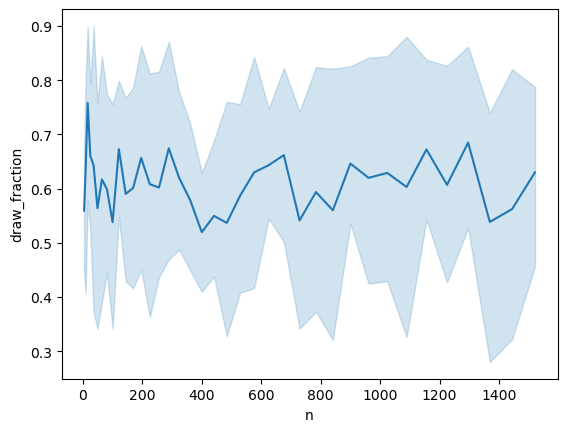

In [126]:
import seaborn as sns
import matplotlib.pyplot as plt

fig,ax=plt.subplots()
sns.lineplot(data=sparse_dataset[["n","draw_fraction","c"]].groupby(["n","c"]).mean(["c"]),x="n",y="draw_fraction",estimator="mean")

In [146]:
dense_results=pd.read_json("/run/media/ramizouari/INTENSO/MPG/results_dense_parallel.json",dtype={"running_time":np.float32},convert_dates=False)
dense_results["graph"]=dense_results["graph"].map(lambda x : x.rstrip(".edgeslist.gz"))

In [148]:
dense_dir="/run/media/ramizouari/INTENSO/MPG/dataset/dense"
dense_results["mean_payoffs"]=dense_results.apply(lambda x: calculate_mean_payoff(os.path.join(dense_dir,x["graph"]+".edgelist.gz"),x["max_strategy"],x["min_strategy"]),axis=1)

In [163]:
x=dense_results.iloc[-2]
calculate_mean_payoff(os.path.join(dense_dir,x["graph"]+".edgelist.gz"),x["max_strategy"],x["min_strategy"])

KeyboardInterrupt: 

In [161]:
dense_results.iloc[-4]

dataset                                                     dense
graph                                   gnp_uniform_mpg_961_961_6
max_strategy    [313, 333, 253, 336, 236, 796, 178, 312, 595, ...
min_strategy    [454, 184, 49, 180, 539, 296, 244, 116, 173, 6...
running_time                                             8.919612
status                                                         OK
mean_payoffs                                                    5
Name: 2146, dtype: object